in x], labels)
plt.legend()
plt.show()


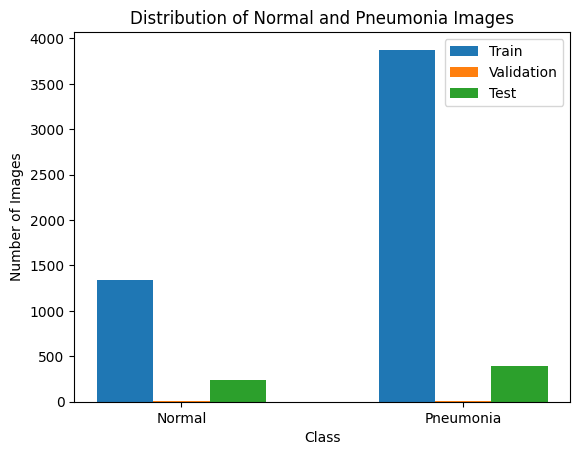

In [134]:
import os
import matplotlib.pyplot as plt

train_path = 'dataset/chest_xray/Train'
val_path = 'dataset/chest_xray/Val'
test_path = 'dataset/chest_xray/Test'

def count_images_in_class(folder_path):
    normal_images = len(os.listdir(os.path.join(folder_path, 'NORMAL')))
    pneumonia_images = len(os.listdir(os.path.join(folder_path, 'PNEUMONIA')))
    return normal_images, pneumonia_images

# Count images in train folder
train_normal, train_pneumonia = count_images_in_class(train_path)

# Count images in validation folder
val_normal, val_pneumonia = count_images_in_class(val_path)

# Count images in test folder
test_normal, test_pneumonia = count_images_in_class(test_path)

# Plot the results
labels = ['Normal', 'Pneumonia']
train_counts = [train_normal, train_pneumonia]
val_counts = [val_normal, val_pneumonia]
test_counts = [test_normal, test_pneumonia]

x = range(len(labels))
width = 0.2

plt.bar(x, train_counts, width, label='Train')
plt.bar([i + width for i in x], val_counts, width, label='Validation')
plt.bar([i + 2 * width for i in x], test_counts, width, label='Test')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Normal and Pneumonia Images')
plt.xticks([i + width for i in x], labels)
plt.legend()
plt.show()


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


#cnn model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])



model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [99]:
#train from scratch

train_datagen = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('dataset/chest_xray/Train',
     target_size = (224,224),
     batch_size = 32,
     class_mode = 'binary'
)





Found 5216 images belonging to 2 classes.


In [90]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [100]:
test_dataset = image.ImageDataGenerator(rescale = 1./255)

Validation_generator = test_dataset.flow_from_directory('dataset/chest_xray/val',
     target_size = (224,224),
     batch_size = 32,
     class_mode = 'binary'
)



Found 16 images belonging to 2 classes.


In [101]:
Validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [102]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,  # Set steps_per_epoch to the total number of batches
    epochs=10,
    validation_data=Validation_generator,
    validation_steps=2
)

Epoch 1/10

8/8 [==============================] - 24s 2s/step - loss: 1.8015 - accuracy: 0.5625 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.5992 - accuracy: 0.7383
Epoch 3/10
8/8 [==============================] - 16s 2s/step - loss: 0.5695 - accuracy: 0.7695
Epoch 4/10
8/8 [==============================] - 16s 2s/step - loss: 0.5731 - accuracy: 0.7578
Epoch 5/10
8/8 [==============================] - 19s 2s/step - loss: 0.5649 - accuracy: 0.7617
Epoch 6/10
8/8 [==============================] - 20s 2s/step - loss: 0.5799 - accuracy: 0.7344
Epoch 7/10
8/8 [==============================] - 20s 2s/step - loss: 0.5511 - accuracy: 0.7227
Epoch 8/10
8/8 [==============================] - 21s 3s/step - loss: 0.4690 - accuracy: 0.7734
Epoch 9/10
8/8 [==============================] - 17s 2s/step - loss: 0.4185 - accuracy: 0.7578
Epoch 10/10
8/8 [==============================] - 19s 2s/step - loss: 0.4124 - accuracy: 0.7

In [104]:
model.save('model_xray.h5')


In [105]:
model.evaluate(train_generator)

 21/163 [==>...........................] - ETA: 2:31 - loss: 0.3993 - accuracy: 0.7351

KeyboardInterrupt: 

In [75]:
model.evaluate(Validation_generator)

20/20 [==============================] - 13s 655ms/step - loss: 0.5116 - accuracy: 0.6645


[0.5115508437156677, 0.664536714553833]

In [ ]:
model = load_model('model_xray.h5')

In [106]:
import os

In [107]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [108]:
y_actual = []
y_test = []

In [119]:
# Initialize empty lists to store predicted and actual values
y_test_list = []
y_actual_list = []

# Loop for class 1
class_1_path = "./dataset/chest_xray/test/PNEUMONIA"
for i in os.listdir(class_1_path):
    if not i.startswith('.'):  # Exclude files starting with '.'
        img = image.load_img(os.path.join(class_1_path, i), target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        
        # Obtain predicted probabilities for each class
        predictions = model.predict(img)
        
        # Assuming binary classification, adjust this threshold based on your needs
        threshold = 0.5
        predicted_class = 1 if predictions[0, 0] > threshold else 0
        
        # Append predicted and actual values
        y_test_list.append(predicted_class)
        y_actual_list.append(1)

        # Print file name, actual class, and predicted class for debugging
        print(f"File: {i}, Actual Class: 1, Predicted Class: {predicted_class}")



1/1 [==============================] - 0s 50ms/step
File: person100_bacteria_475.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 46ms/step
File: person100_bacteria_477.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 52ms/step
File: person100_bacteria_478.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 56ms/step
File: person100_bacteria_479.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 55ms/step
File: person100_bacteria_480.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 56ms/step
File: person100_bacteria_481.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 64ms/step
File: person100_bacteria_482.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [==============================] - 0s 65ms/step
File: person101_bacteria_483.jpeg, Actual Class: 1, Predicted Class: 1
1/1 [===========

In [120]:
# Print the entire list of predicted and actual values
print("Predicted Classes:", y_test_list)
print("Actual Classes   :", y_actual_list)


Predicted Classes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [121]:
# Initialize empty lists to store predicted and actual values
y_test_list_1 = []
y_actual_list_1 = []

# Loop for class 0
class_0_path = "./dataset/chest_xray/test/NORMAL"
for i in os.listdir(class_0_path):
    # Skip non-image files
    if not i.endswith(('.jpg', '.jpeg', '.png')):
        continue
    
    img_path = os.path.join(class_0_path, i)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Obtain predicted probabilities for each class
    predictions = model.predict(img)

    # Assuming binary classification, adjust this threshold based on your needs
    threshold = 0.5
    predicted_class = 0 if predictions[0, 0] > threshold else 1

    # Append predicted and actual values
    y_test_list_1.append(predicted_class)
    y_actual_list_1.append(0)

    # Print file name and predicted class for debugging
    print(f"File: {i}, Actual Class: 0, Predicted Class: {predicted_class}")





1/1 [==============================] - 0s 44ms/step
File: IM-0001-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 48ms/step
File: IM-0003-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 40ms/step
File: IM-0005-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 52ms/step
File: IM-0006-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 46ms/step
File: IM-0007-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 42ms/step
File: IM-0009-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 44ms/step
File: IM-0010-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 54ms/step
File: IM-0011-0001-0001.jpeg, Actual Class: 0, Predicted Class: 0
1/1 [==============================] - 0s 50ms/step
File: IM-0011-0001-0002.jpeg, Actual Cl

In [122]:
# Print the entire list of predicted and actual values
print("Predicted Classes:", y_test_list_1)
print("Actual Classes   :", y_actual_list_1)

Predicted Classes: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual Classes   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

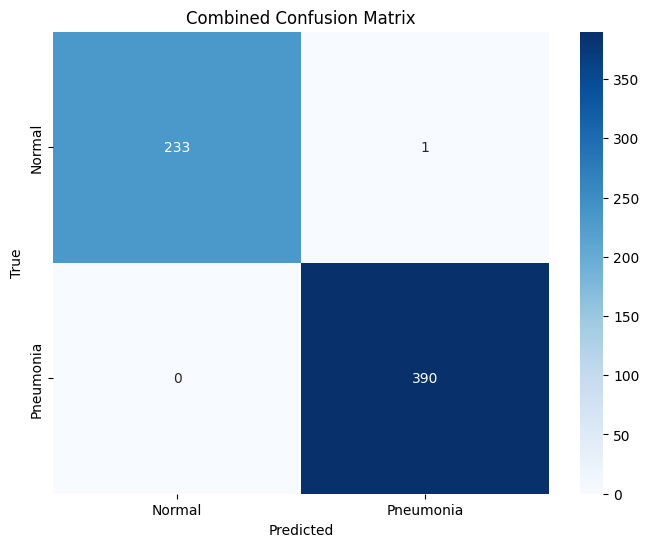

In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the lists for both classes
y_test = y_test_list + y_test_list_1
y_actual = y_actual_list + y_actual_list_1

# Generate confusion matrix
conf_matrix = confusion_matrix(y_actual, y_test)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Confusion Matrix')
plt.show()


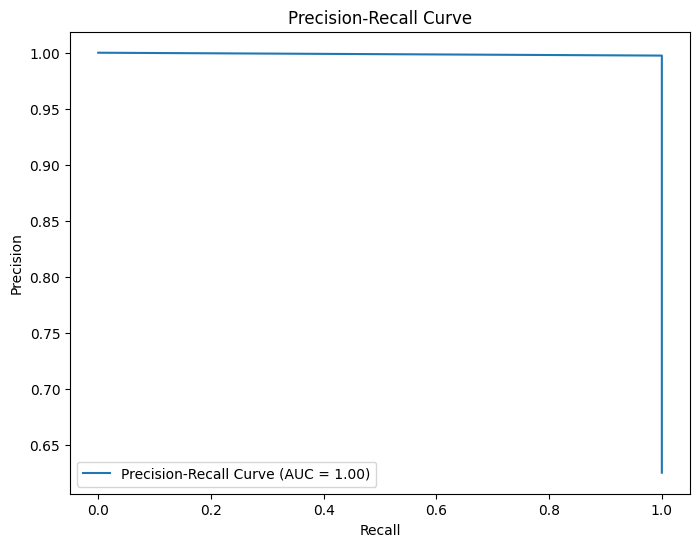

In [125]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_actual, y_test)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


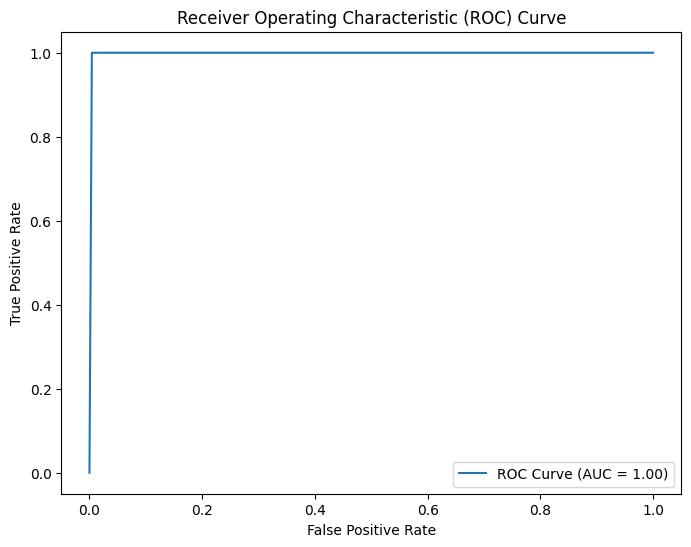

In [126]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_actual, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


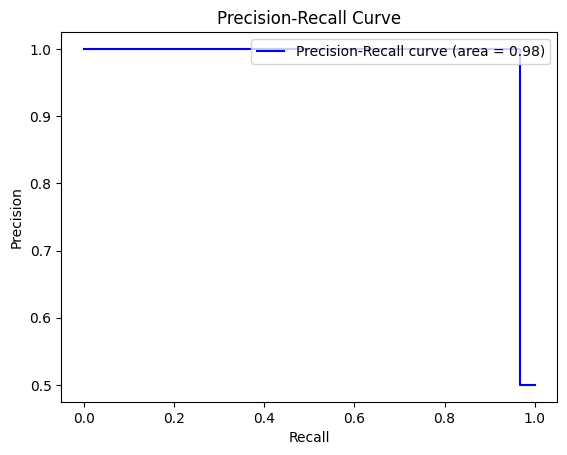

In [150]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_actual, y_test)
avg_precision = average_precision_score(y_actual, y_test)

plt.figure()
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (area = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       390

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



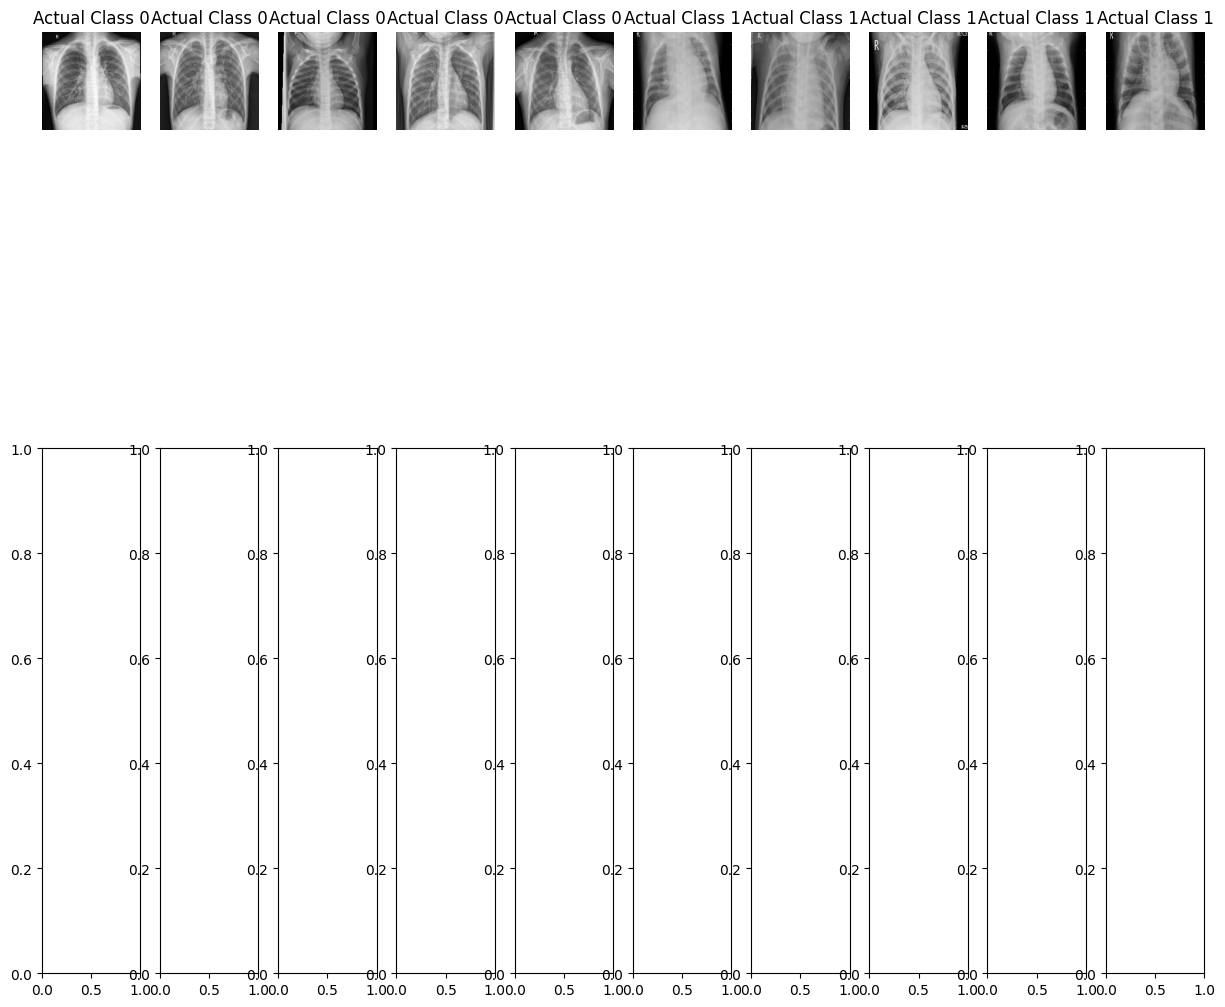